Build a regression model.

In [329]:
pip install scipy

In [410]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat
sns.set()

In [384]:
result_1 = pd.read_csv("Part3.csv")
result_1.dropna()
result_1.drop('Unnamed: 0',axis=1, inplace= True)
result_1.drop('Unnamed: 0.1',axis=1, inplace= True)
result_1.drop('Unnamed: 0.2',axis=1, inplace= True)

In [385]:
print(result_1) # Printing the result

            lat       long  total_bikes           restaurant_name  distance  \
0     43.665269 -79.319796         19.0                    Te Aro      1570   
1     43.671420 -79.445947         15.0             Boxcar Social      2262   
2     43.666224 -79.317693         23.0       House on Parliament      3867   
3     43.653236 -79.376716         25.0            Neo Coffee Bar      4293   
4     43.663722 -79.380288         15.0              Cluny Bistro      3467   
...         ...        ...          ...                       ...       ...   
6525        NaN        NaN          NaN                       Pai      2188   
6526        NaN        NaN          NaN            Neo Coffee Bar      2035   
6527        NaN        NaN          NaN                    Eataly       687   
6528        NaN        NaN          NaN  The Keg Steakhouse + Bar      1891   
6529        NaN        NaN          NaN               Tim Hortons       976   

      rating            location  
0        8.9    

In [387]:
result_1.dropna()


,lat,long,total_bikes,restaurant_name,distance,rating,location
0,43.665269,-79.319796,19.0,Te Aro,1570,8.9,983 Queen St E
1,43.671420,-79.445947,15.0,Boxcar Social,2262,8.9,4 Boulton Ave
2,43.666224,-79.317693,23.0,House on Parliament,3867,8.9,454 Parliament St
3,43.653236,-79.376716,25.0,Neo Coffee Bar,4293,9.0,161 Frederick St
4,43.663722,-79.380288,15.0,Cluny Bistro,3467,8.5,35 Tank House Lane
...,...,...,...,...,...,...,...
648,43.772445,-79.511912,15.0,Cafe Landwer,6429,8.7,165 University Ave
649,43.653359,-79.365023,11.0,Chotto Matte,6981,8.8,161 Bay St
650,43.706436,-79.251044,11.0,Burdock,3175,9.1,1184 Bloor St W
651,43.655972,-79.370638,15.0,Communist's Daughter,2135,8.6,1149 Dundas St W


In [398]:
result_1.dropna().to_csv("Part4-00.csv")

In [411]:
result_2 = pd.read_csv("Part4-00.csv")
print(result_2)

     Unnamed: 0        lat       long  total_bikes       restaurant_name  \
0             0  43.665269 -79.319796         19.0                Te Aro   
1             1  43.671420 -79.445947         15.0         Boxcar Social   
2             2  43.666224 -79.317693         23.0   House on Parliament   
3             3  43.653236 -79.376716         25.0        Neo Coffee Bar   
4             4  43.663722 -79.380288         15.0          Cluny Bistro   
..          ...        ...        ...          ...                   ...   
648         648  43.772445 -79.511912         15.0          Cafe Landwer   
649         649  43.653359 -79.365023         11.0          Chotto Matte   
650         650  43.706436 -79.251044         11.0               Burdock   
651         651  43.655972 -79.370638         15.0  Communist's Daughter   
652         652  43.666874 -79.381155         12.0                   Pai   

     distance  rating            location  
0        1570     8.9      983 Queen St E  

In [358]:
#result_1.drop('Unnamed: 0.1',axis=1, inplace= True)

In [359]:
#result_1.drop('Unnamed: 0',axis=1, inplace= True)

In [360]:
#result_1.drop('Unnamed: 0.2',axis=1, inplace= True)

In [373]:
#result_2=result_1.drop('Unnamed: 0.2',axis=1, inplace= True) # describing the data frame

In [412]:
result_2.corr() #coefficient

,Unnamed: 0,lat,long,total_bikes,distance,rating
Unnamed: 0,1.000000,0.179678,-0.008743,0.026379,0.188022,-0.102149
lat,0.179678,1.000000,0.368258,-0.104409,0.034617,-0.059834
long,-0.008743,0.368258,1.000000,-0.030067,-0.040778,0.015603
total_bikes,0.026379,-0.104409,-0.030067,1.000000,-0.030291,0.013199
distance,0.188022,0.034617,-0.040778,-0.030291,1.000000,0.131032
rating,-0.102149,-0.059834,0.015603,0.013199,0.131032,1.000000


In [413]:
result_2.drop('Unnamed: 0',axis=1, inplace= True)

In [406]:
result_2=np.asarray(result_1)

In [414]:
stat,p1 = scipy.stats.pearsonr(result_2['distance'], result_2['total_bikes']) #0.043 p vaule fails to rejct H0
stat,p2 = scipy.stats.pearsonr(result_2['rating'],result_2['total_bikes']) # 0.736 p vaule fails to reject H0
print(p1) # p value
print(p2)

0.4396665163460437
0.7363852267496762


In [421]:
y=result_2['total_bikes']
X=result_2['distance']
X=sm.add_constant(X)
X.head() #adding the constant

,const,distance
0,1.0,1570
1,1.0,2262
2,1.0,3867
3,1.0,4293
4,1.0,3467


In [422]:
model = sm.OLS(y,X) 
results = model.fit()
print(results.summary()) # building the OLS regression for toal bikes,distance

                            OLS Regression Results                            
Dep. Variable:            total_bikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5979
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.440
Time:                        14:52:10   Log-Likelihood:                -2130.0
No. Observations:                 653   AIC:                             4264.
Df Residuals:                     651   BIC:                             4273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3234      0.449     43.029      0.0

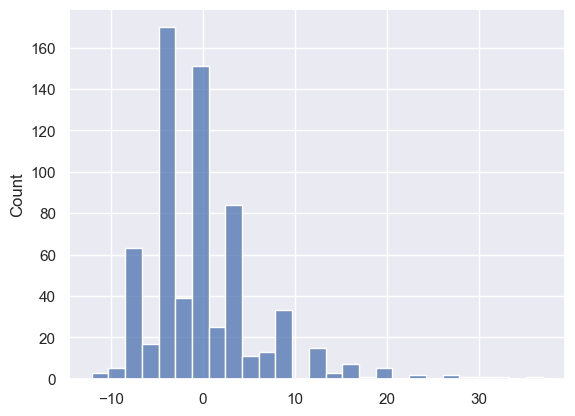

In [287]:
sns.histplot(results.resid)
plt.show()

In [298]:
mu,std= stat.norm.fit(results.resid)
mu,std

AttributeError: Module 'scipy' has no attribute 'norm'

NameError: name 'stats' is not defined

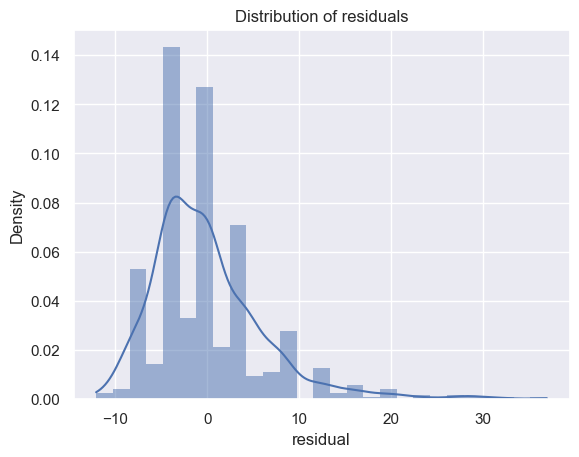

In [288]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=results.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [283]:
y1=result_1['total_bikes']
X1=result_1['rating']
X1=sm.add_constant(X1)
X1.head() #adding the constant

,const,rating
0,1.0,8.9
1,1.0,8.9
2,1.0,8.9
3,1.0,9.0
4,1.0,8.5


In [420]:
model = sm.OLS(y1,X1) 
results = model.fit()
print(results.summary()) # building the OLS regression for total bikes and rating

                            OLS Regression Results                            
Dep. Variable:            total_bikes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1134
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.736
Time:                        14:50:04   Log-Likelihood:                -2130.3
No. Observations:                 653   AIC:                             4265.
Df Residuals:                     651   BIC:                             4274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6765      9.971      1.572      0.1

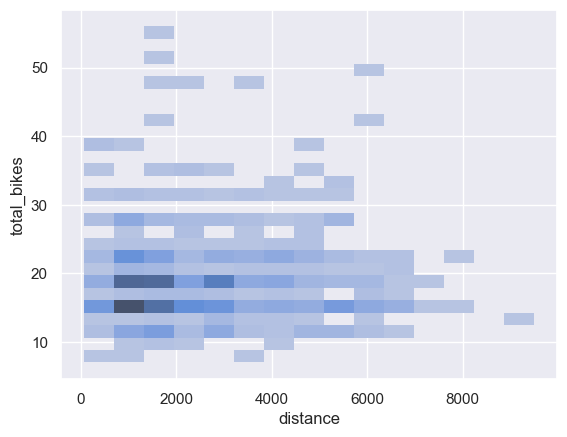

In [275]:
sns.set_theme()
sns.histplot(data=result_1,y='total_bikes',x='distance')
plt.show()

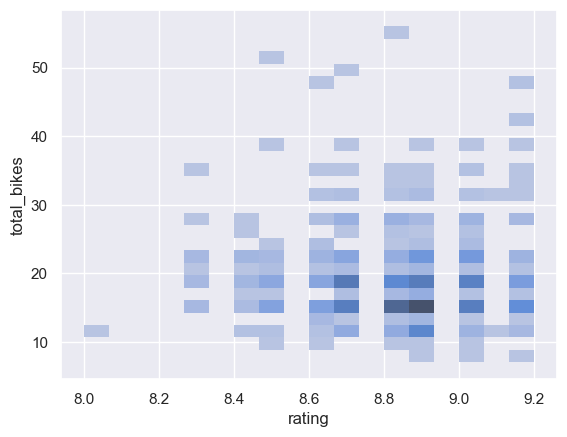

In [274]:
sns.set_theme()
sns.histplot(data=result_1,y='total_bikes',x='rating')
plt.show()

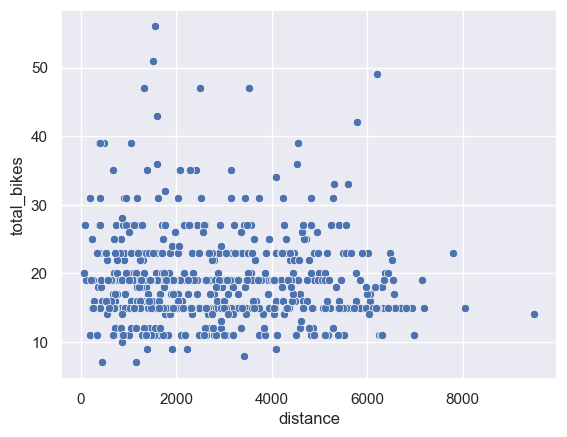

In [273]:
sns.scatterplot(y=result_1['total_bikes'],x=result_1['distance'])
plt.show()

In [292]:
stat,p =sm.pearsonr(x=result_1['total_bikes'],y=result_1['distance'])
p

AttributeError: module 'statsmodels.api' has no attribute 'pearsonr'

In [169]:
#result_1.drop('Unnamed: 0',axis=1, inplace= True)

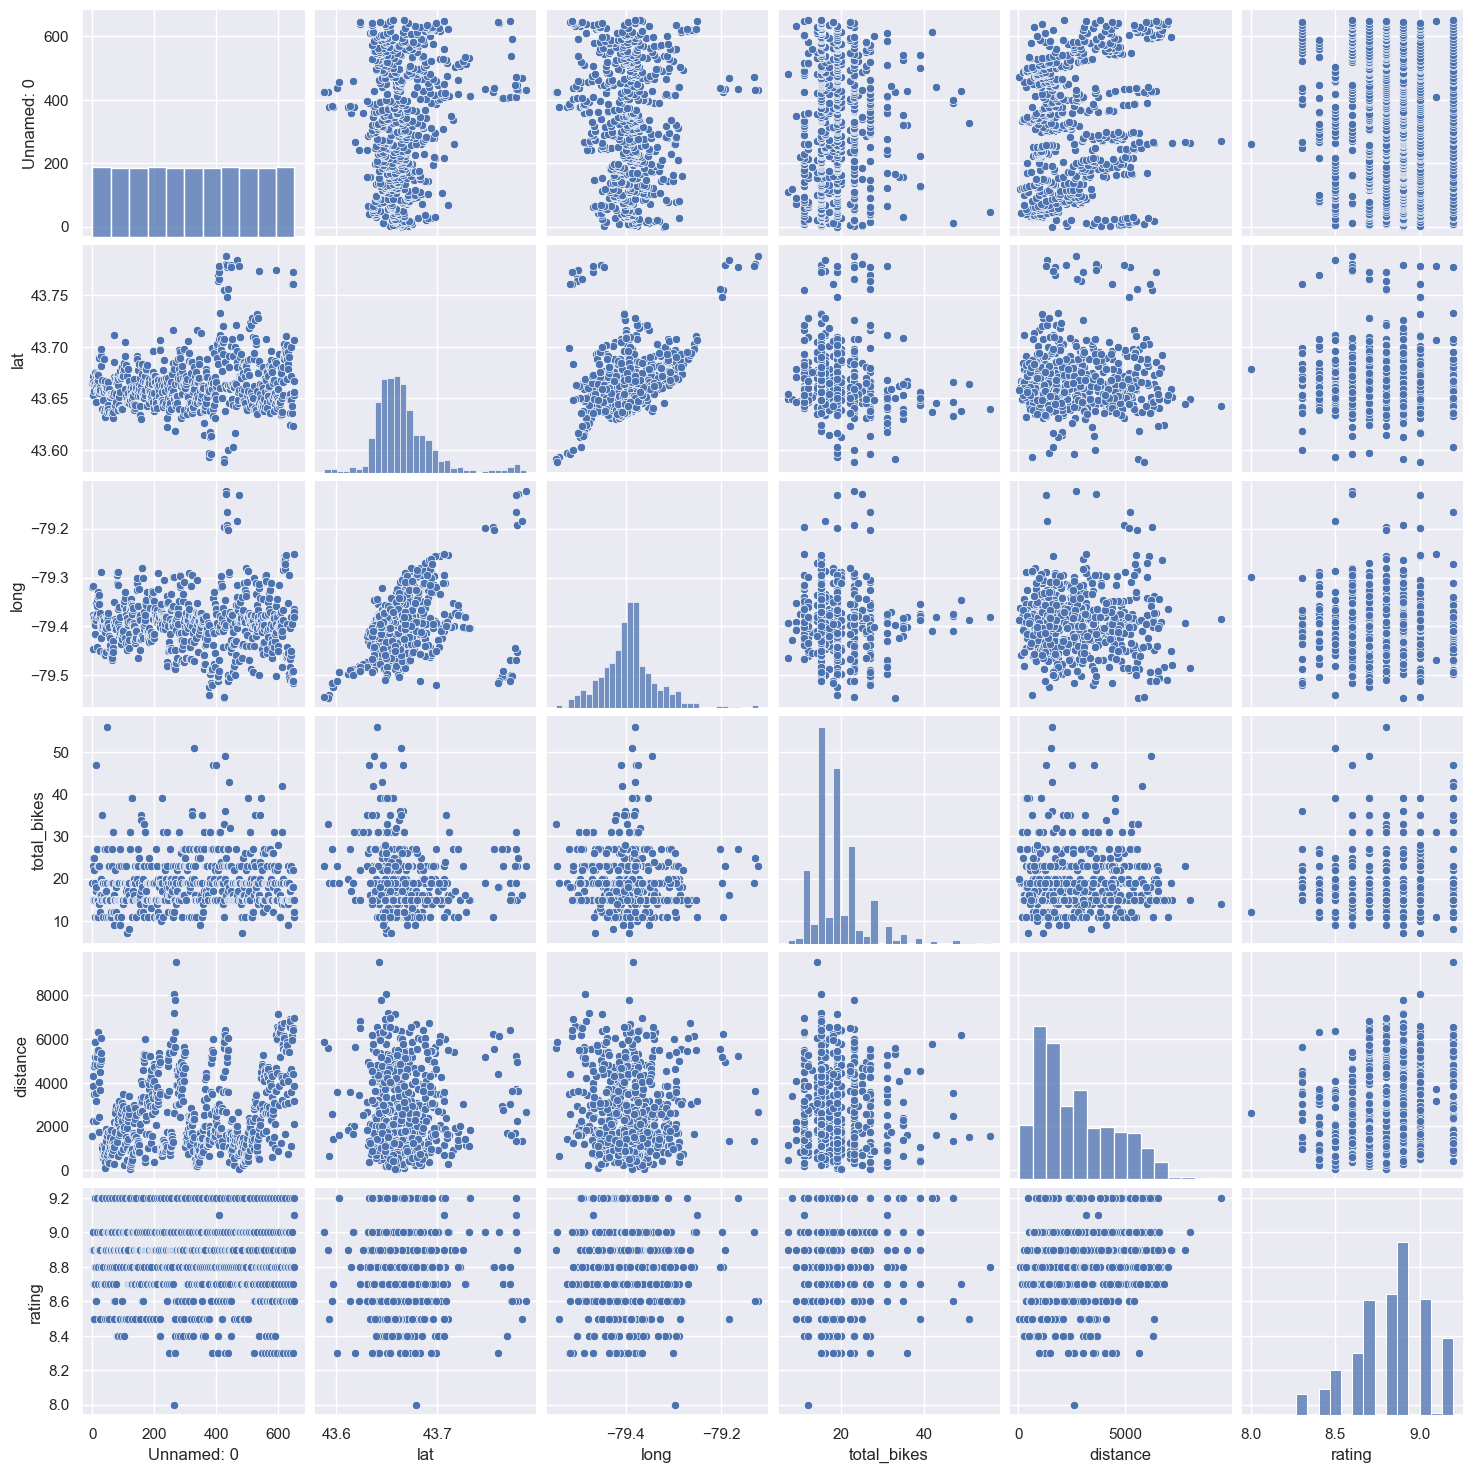

In [212]:
sns.pairplot(data=result_1)
plt.show()

Provide model output and an interpretation of the results. 

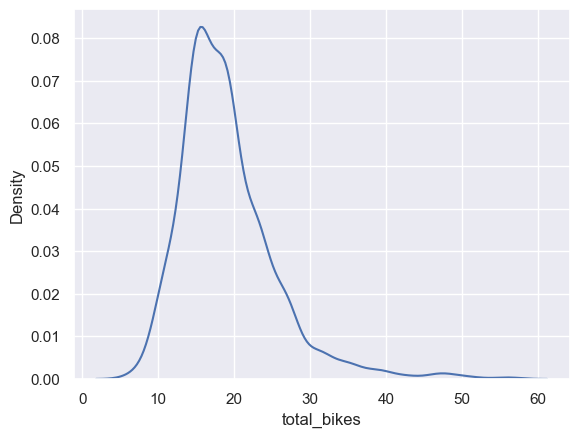

In [269]:
sns.kdeplot(data=result_1,x=result_1['total_bikes'])
plt.show()

# Stretch

How can you turn the regression model into a classification model?

0     -0.005328
1     -0.637938
2      0.627282
3      0.943587
4     -0.637938
         ...   
648   -0.637938
649   -1.270548
650   -1.270548
651   -0.637938
652   -1.112396
Name: total_bikes, Length: 653, dtype: float64


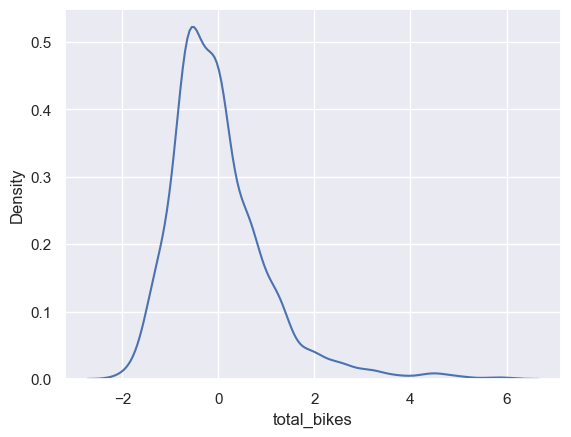

In [217]:
total=(result_1['total_bikes']- result_1['total_bikes'].mean())/result_1['total_bikes'].std() # standardize the column
#print(total)
sns.kdeplot(data=total)
plt.show()

In [ ]:
y = result_1["total_bikes"]
x = result_1 ["rating"]

In [270]:
y = result_1["total_bikes"]
x = result_1 ["rating"]

slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[ 0.38076412 15.676494  ]


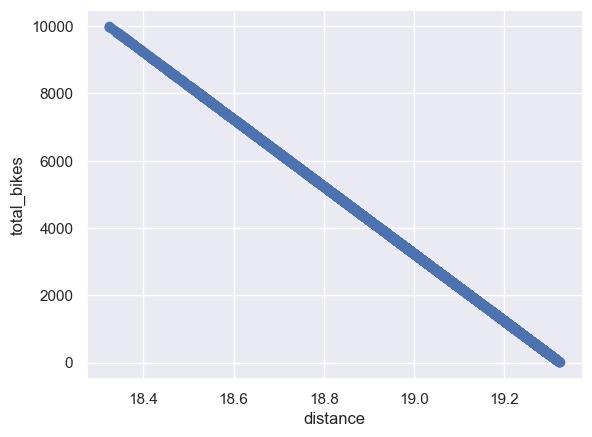

In [423]:
y = result_1["total_bikes"]
x = result_1 ["distance"]
#plt.scatter(y,x)
y1 = -0.0001 *x  + 19.3234
fig= plt.plot(y1,x)

plt.scatter(y1,x)
#plt.ylim(ymin=0)
#plt.xlim(xmin=0)
plt.xlabel("distance")
plt.ylabel ("total_bikes")

plt.show()

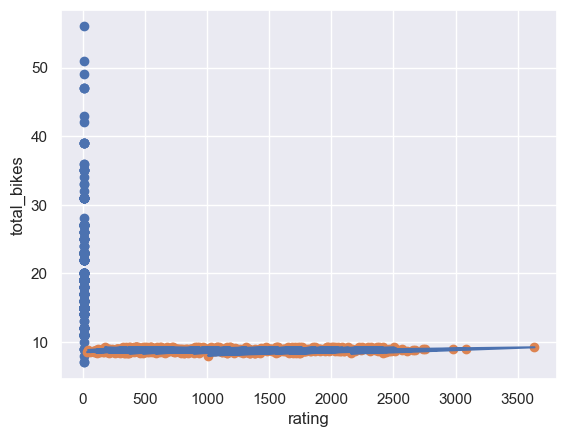

In [285]:
y2 = result_1["total_bikes"]
x2 = result_1 ["rating"]
plt.scatter(x2,y2)
y3 = 0.3808  * x + 15.6765
fig= plt.plot(y3,x2)

plt.scatter(y3,x2)
#plt.ylim(ymin=0)
#plt.xlim(xmin=0)
plt.xlabel("rating")
plt.ylabel ("total_bikes") 

plt.show()